In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans


In [4]:
df=pd.read_csv('Mall_Customers.csv')

In [5]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.isnull().sum().sum()

0

# UNIVARIATE Analysis

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

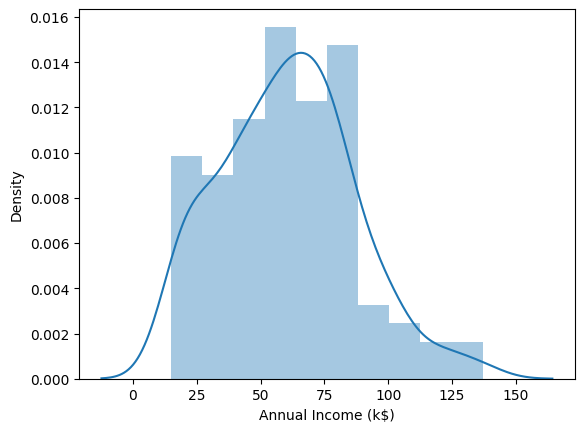

In [8]:
sns.distplot(df["Annual Income (k$)"])

In [9]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

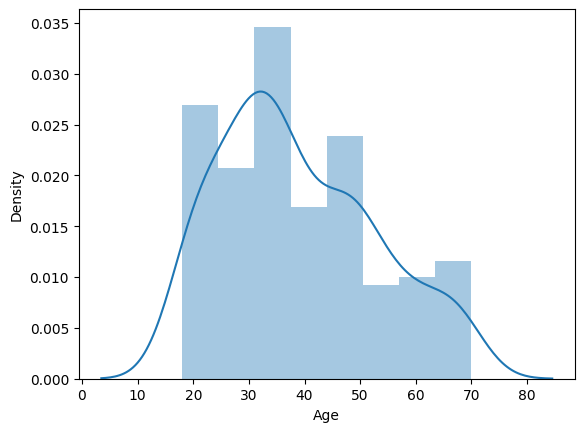

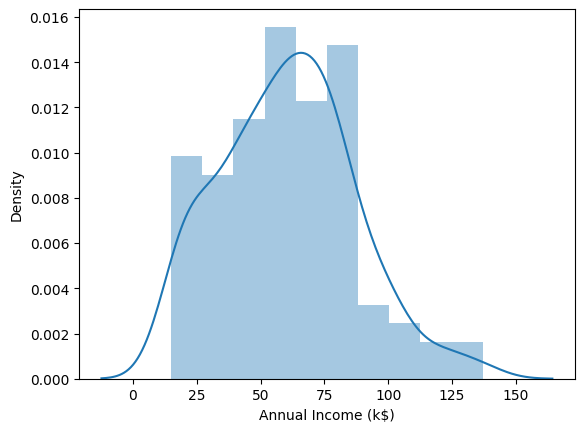

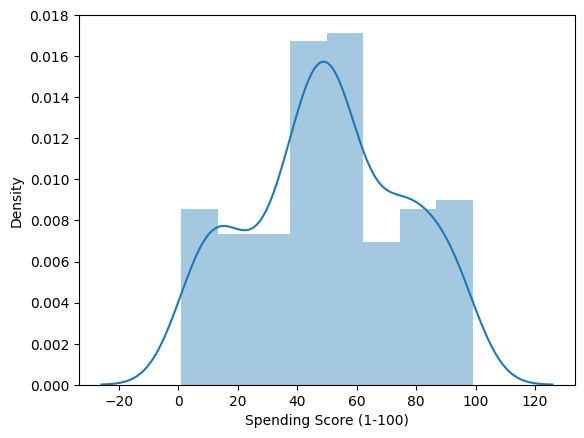

In [10]:
columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

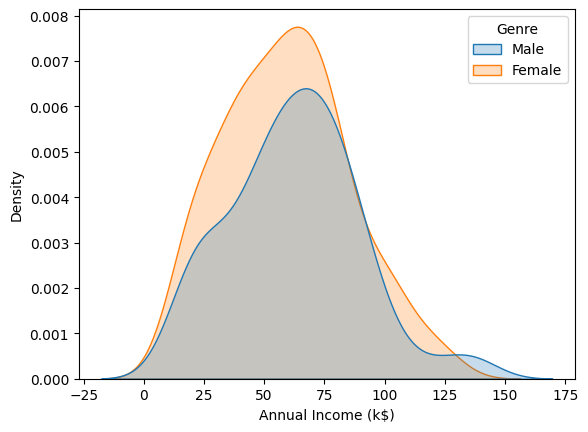

In [11]:
sns.kdeplot(data=df,x='Annual Income (k$)',hue='Genre',fill=True)

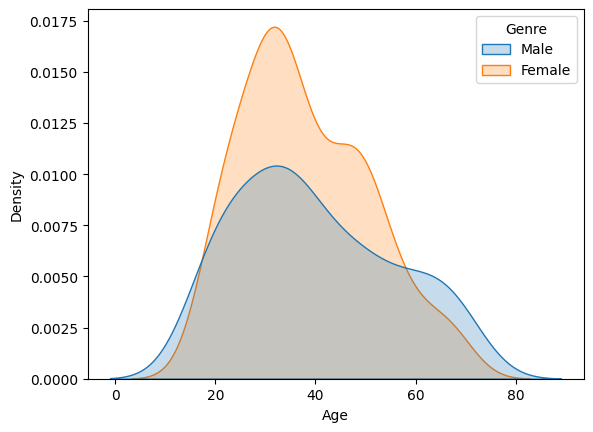

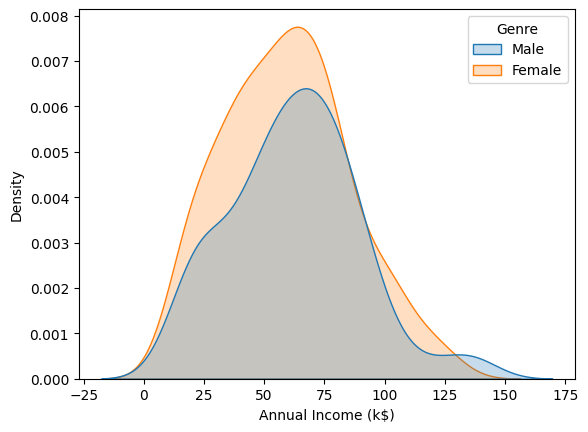

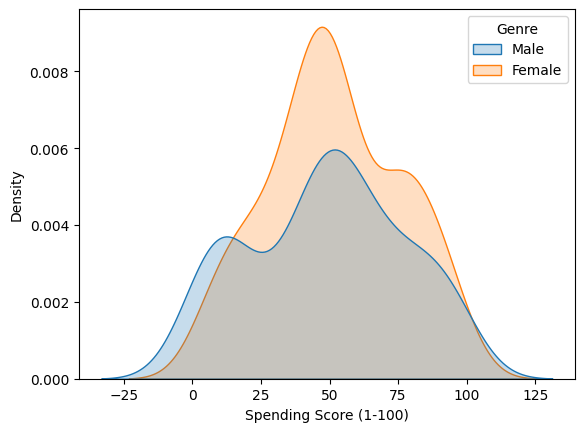

In [18]:
columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(data=df, x=i,hue='Genre', fill=True)

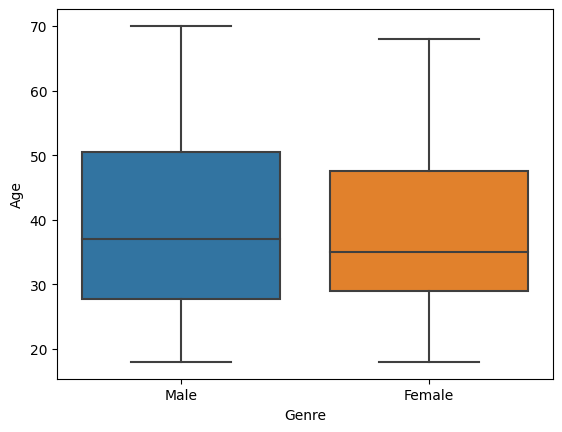

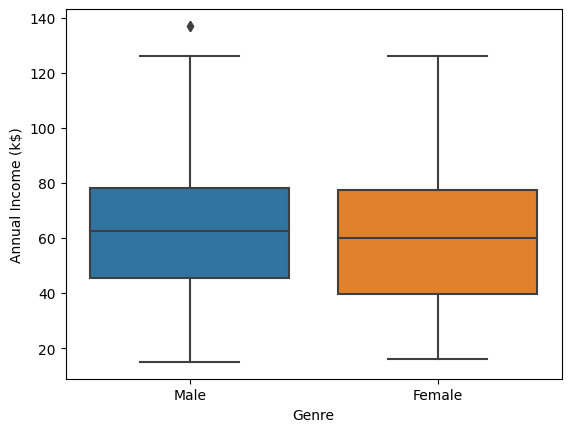

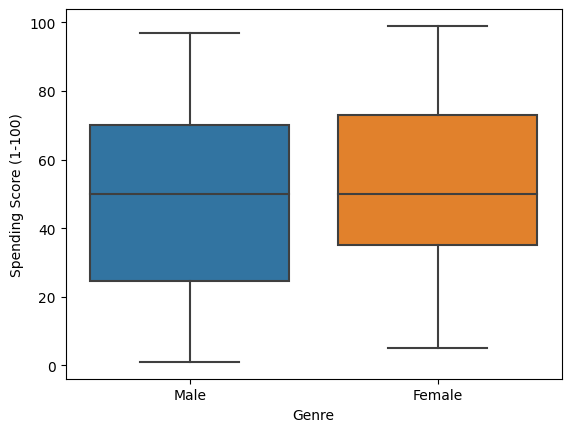

In [19]:
columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Genre',y=df[i])
   

In [20]:
df["Genre"].value_counts(normalize=True)

Genre
Female    0.56
Male      0.44
Name: proportion, dtype: float64

# BIVARIATE Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

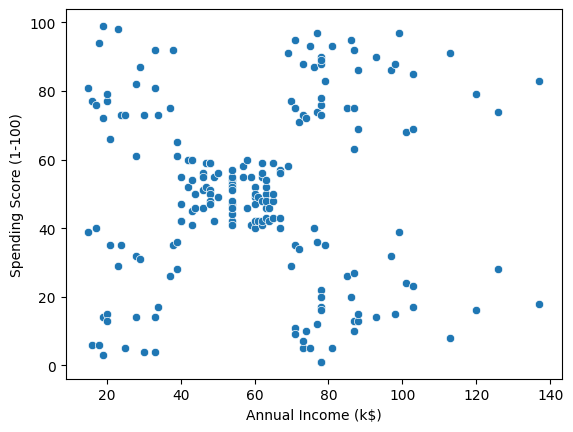

In [21]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)')

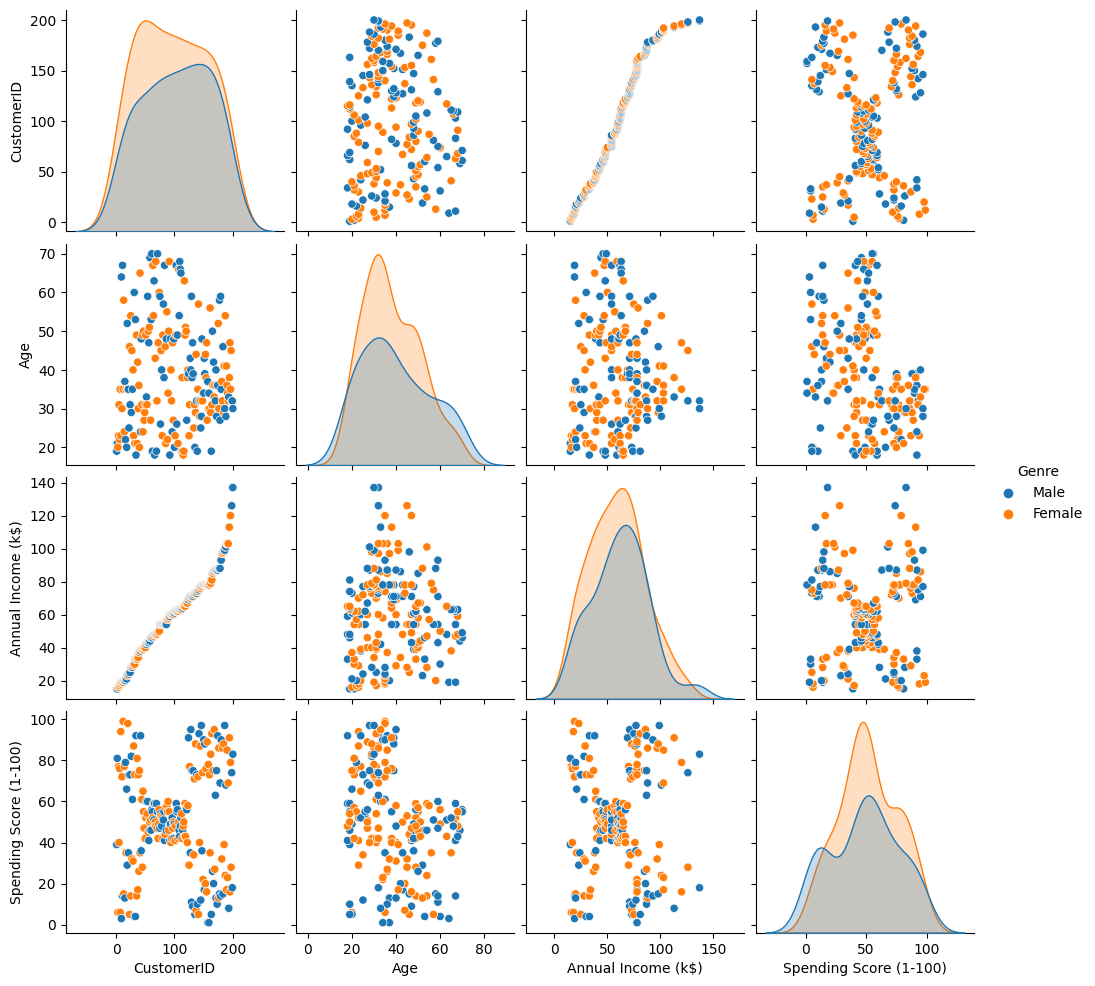

In [22]:
#df=df.drop("CustomerID",axis=1)
sns.pairplot(data=df,hue="Genre")

In [23]:
df.groupby("Genre")[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Genre,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [30]:
df['Genre'] = df['Genre'].map({'Male': 0, 'Female': 1})

In [33]:
df.corr()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.057400,-0.026763,0.977548,0.013835
Genre,-0.057400,1.000000,-0.060867,-0.056410,0.058109
Age,-0.026763,-0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,0.058109,-0.327227,0.009903,1.000000


<Axes: >

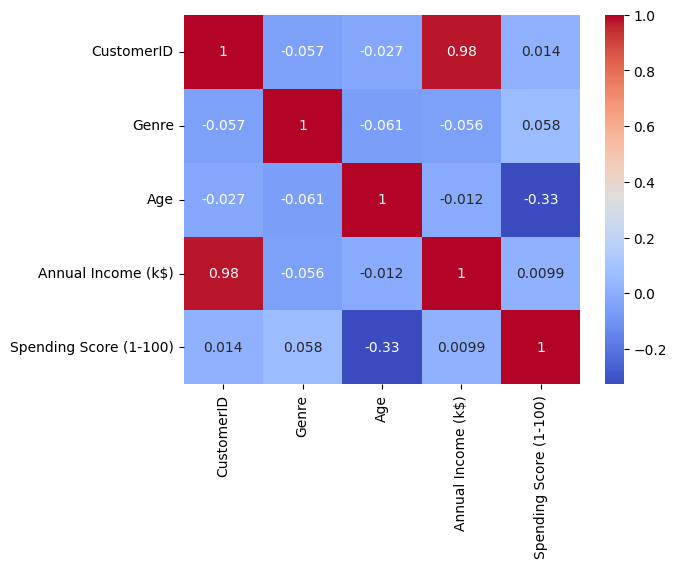

In [34]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

# CLUSTERING- Univariate,Bivariate

In [35]:
clustering1= KMeans(n_clusters=3)

In [36]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [37]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [38]:
df["Income_cluster"]=clustering1.labels_
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Income_cluster
0,1,0,19,15,39,0
1,2,0,21,15,81,0
2,3,1,20,16,6,0
3,4,1,23,16,77,0
4,5,1,31,17,40,0


In [39]:
df["Income_cluster"].value_counts()

Income_cluster
2    90
0    74
1    36
Name: count, dtype: int64

In [40]:
clustering1.inertia_

23517.330930930926

In [41]:
inertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [42]:
inertia_scores

[137277.28000000003,
 48660.88888888888,
 23517.330930930926,
 13278.112713472488,
 8481.496190476191,
 5081.484660267269,
 3949.275613275613,
 2831.296031746032,
 2173.287445887446,
 1784.4503956827489]

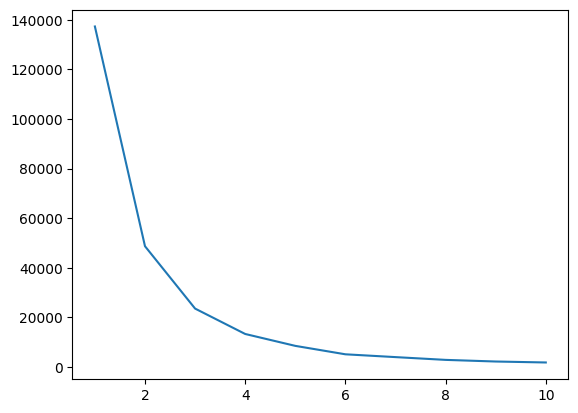

In [43]:
plt.plot(range(1,11),inertia_scores)

In [46]:
df.groupby('Income_cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income_cluster,,,
0,39.500000,33.486486,50.229730
1,37.833333,99.888889,50.638889
2,38.722222,67.088889,50.000000


# Bivariate

In [48]:
clustering2= KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df["spending_and_Income_cluster"]=clustering2.labels_
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Income_cluster,spending_and_Income_cluster
0,1,0,19,15,39,0,2
1,2,0,21,15,81,0,0
2,3,1,20,16,6,0,2
3,4,1,23,16,77,0,0
4,5,1,31,17,40,0,2


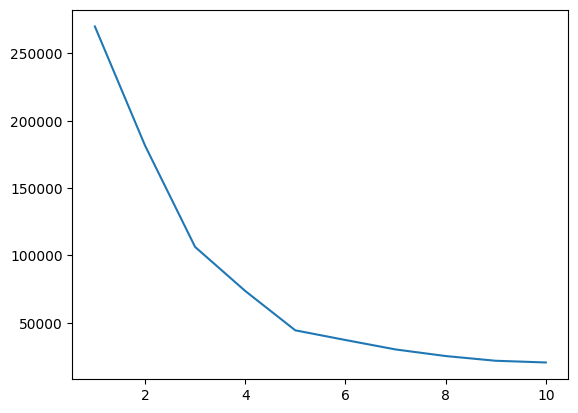

In [49]:
inertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),inertia_scores2)

In [50]:
centers=pd.DataFrame(clustering2.cluster_centers_)
centers.columns=["x","y"]

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

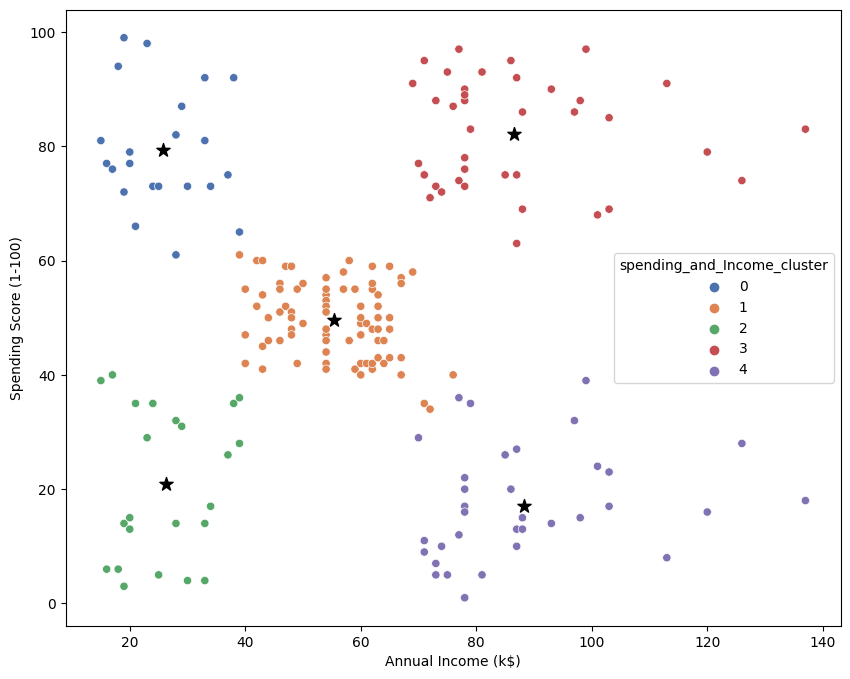

In [58]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers["x"],y=centers["y"],s=100,c="black",marker="*")
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='spending_and_Income_cluster',palette='deep')

In [59]:
pd.crosstab(df["spending_and_Income_cluster"],df["Genre"],normalize="index")

Genre,0,1
spending_and_Income_cluster,,
0,0.409091,0.590909
1,0.407407,0.592593
2,0.391304,0.608696
3,0.461538,0.538462
4,0.542857,0.457143


In [61]:
df.groupby('spending_and_Income_cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
spending_and_Income_cluster,,,
0,25.272727,25.727273,79.363636
1,42.716049,55.296296,49.518519
2,45.217391,26.304348,20.913043
3,32.692308,86.538462,82.128205
4,41.114286,88.200000,17.114286
